# Tutorial 3

**CS3481 Fundamentals of Data Science**

*Semester B 2019/20*
___
**Instructions:**
- same as [Tutorial 1](http://bit.ly/CS3481T1).
- Submit your answers of Exercise 1 and 2 through [uReply](https://cityu.ed2.mobi/student/mobile_index.php) section number **LM773**. 
___

## Exercise 1 (submit via uReply)

Complete the tutorial exercises of [[Witten11]](https://ebookcentral.proquest.com/lib/cityuhk/reader.action?docID=634862&ppg=597) from **Exercise 17.1.8** to **17.1.10**.



___
**Answers to 17.1.9:** 

**Answers to 17.1.9:** 

**Answers to 17.1.10:**
___


## Exercise 2 (submit via uReply)


Answer the following questions and *explain your answers*. Give *examples* whenever possible.

(a) Is a classifier necessarily good if it does not overfit? 

___
**Answer:**

___

(b) Can the holdout method prevent a classifier from overfitting?

___
**Answer:**

___

## Exercise 3 (Optional)

The following illustrates some methods evaluating a classification algorithm. First, we import the iris data set from `sklearn.datasets` package and assign the input features and target to `X` and `Y` respectively.

In [0]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data']
Y = iris['target']

X.shape, Y.shape # show the dimensions of the input features and target

((150, 4), (150,))

### (a) Holdout method

Split the dataset into training set and test set using `train_test_split` function from the `sklearn.model_selection` package.

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.4, # randomly holdout 40% of data
                                                    random_state=0) # using a random seed of 0.

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape # show the dimensions of the training and testing data

((90, 4), (90,), (60, 4), (60,))

(i) What is the benefit of specifying a random seed?

___
***Answers***:
___

Apply the decision tree algorithm to train a classifier on the training set.

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()

[Text(133.92000000000002, 195.696, 'X[3] <= 0.75\ngini = 0.663\nsamples = 90\nvalue = [34, 27, 29]'),
 Text(66.96000000000001, 152.208, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(200.88000000000002, 152.208, 'X[2] <= 5.05\ngini = 0.499\nsamples = 56\nvalue = [0, 27, 29]'),
 Text(133.92000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.128\nsamples = 29\nvalue = [0, 27, 2]'),
 Text(66.96000000000001, 65.232, 'gini = 0.0\nsamples = 26\nvalue = [0, 26, 0]'),
 Text(200.88000000000002, 65.232, 'X[1] <= 3.1\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(133.92000000000002, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(267.84000000000003, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(267.84000000000003, 108.72, 'gini = 0.0\nsamples = 27\nvalue = [0, 0, 27]')]

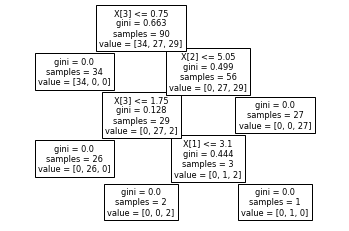

In [0]:
tree.plot_tree(
    clf.fit(X_train, Y_train) # fit the model to the training set 
    ) # plot the fitted model

Evaluate the classifier by computing the accuracy score on the test set.

In [0]:
print('Accuracy: {:0.2f}'.format(clf.score(X_test, Y_test)))

Accuracy: 0.95


To investigate the errors further, one can return the classifier predictions on the test data.

In [0]:
Y_test_pred = clf.predict(X_test)

In [0]:
import pandas as pd
import numpy as np

holdout_pd = pd.DataFrame(data = np.c_[X_test, Y_test, Y_test_pred], columns = iris['feature_names']+['target']+['prediction'])
holdout_pd.loc[holdout_pd['target'] != holdout_pd['prediction']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction
37,6.0,2.7,5.1,1.6,1.0,2.0
48,6.0,2.2,5.0,1.5,2.0,1.0
56,4.9,2.5,4.5,1.7,2.0,1.0


(ii) Compute the accuracy of the classifier on the training set. Compare it with the test accuracy and explain why the training accuracy is larger or small.

### (b) Cross validation

Use 10-fold cross validation to test the decision tree algorithm.

In [0]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(clf, X, Y, cv=10)

scores

array([1.        , 0.93333333, 1.        , 0.93333333, 0.93333333,
       0.86666667, 0.93333333, 1.        , 1.        , 1.        ])

In [0]:
print('Accuracy: {:0.2f} (+/- {:0.2f})'.format(scores.mean(), scores.std() * 2))

Accuracy: 0.96 (+/- 0.09)


Obtain the prediction on each instance. 

In [0]:
from sklearn.model_selection import cross_val_predict

Y_pred = cross_val_predict(clf, X, Y, cv=10)

In [0]:
import pandas as pd
import numpy as np

cv_pd = pd.DataFrame(data = np.c_[X, Y, Y_pred], columns = iris['feature_names']+['target']+['prediction'])
cv_pd.loc[cv_pd['target'] != cv_pd['prediction']]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,prediction
70,5.9,3.2,4.8,1.8,1.0,2.0
77,6.7,3.0,5.0,1.7,1.0,2.0
83,6.0,2.7,5.1,1.6,1.0,2.0
106,4.9,2.5,4.5,1.7,2.0,1.0
119,6.0,2.2,5.0,1.5,2.0,1.0
129,7.2,3.0,5.8,1.6,2.0,1.0


(i) Why can we use cross validation to return the classifier predictions for ***the entire dataset*** but we can only use the holdout method to return predictions for the ***test set*** but not the training set?

___
***Answers***
___

### (c) Bootstrap

(i) Follow the documentation [here](https://ogrisel.github.io/scikit-learn.org/sklearn-tutorial/modules/generated/sklearn.cross_validation.Bootstrap.html) to explore the boostrapping method.